In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


Using solution from: https://365datascience.com/question/remotedataerror-unable-to-read-url-for-yahoo-using-pandas-datareader/

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install yfinance --upgrade --no-cache-dir

In [ ]:
import yfinance as yf

In [ ]:
from pandas_datareader import data as pdr

In [ ]:
yf.pdr_override()

In [ ]:
df = pdr.get_data_yahoo('TSLA', start='2012-01-01', end='2022-7-31')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,5.788000,5.900000,5.530000,5.616000,5.616000,4640500
2012-01-04,5.642000,5.734000,5.500000,5.542000,5.542000,3150500
2012-01-05,5.552000,5.586000,5.370000,5.424000,5.424000,5027500
2012-01-06,5.440000,5.558000,5.282000,5.382000,5.382000,4931500
2012-01-09,5.400000,5.498000,5.224000,5.450000,5.450000,4485000
...,...,...,...,...,...,...
2022-07-25,816.650024,822.440002,802.200012,805.299988,805.299988,21357800
2022-07-26,799.539978,801.929993,768.789978,776.580017,776.580017,22273600
2022-07-27,791.429993,827.780029,785.369995,824.460022,824.460022,29370000


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.shape

(2661, 6)

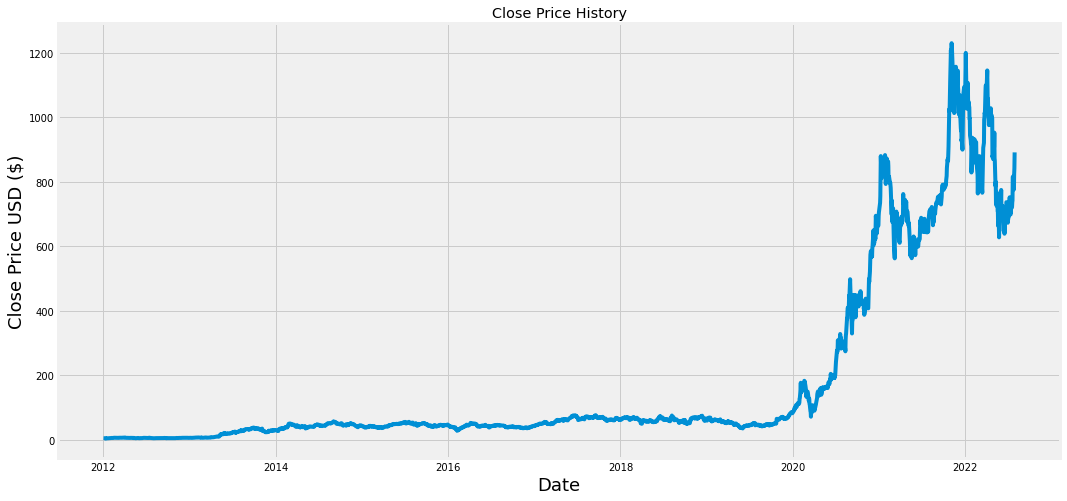

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_length = math.ceil(len(dataset) * 0.8)
print(training_data_length)

2129


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[8.63425414e-04],
       [8.03034313e-04],
       [7.06735432e-04],
       ...,
       [6.69115486e-01],
       [6.84000996e-01],
       [7.23785482e-01]])

In [ ]:
train_data = scaled_data[0:training_data_length, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()
  

[array([0.00086343, 0.00080303, 0.00070674, 0.00067246, 0.00072795,
       0.00078834, 0.00088791, 0.00089117, 0.        , 0.00062186,
       0.00065614, 0.00064798, 0.00062186, 0.00064961, 0.0007557 ,
       0.00084547, 0.00100379, 0.00106745, 0.00110662, 0.00102501,
       0.00110825, 0.00121761, 0.00136451, 0.0014706 , 0.00143795,
       0.00149182, 0.00159791, 0.00135634, 0.00142   , 0.00169421,
       0.00176439, 0.00185906, 0.001988  , 0.00191129, 0.00186559,
       0.00191618, 0.00178887, 0.00176766, 0.00179867, 0.00173338,
       0.0018966 , 0.00183621, 0.00179214, 0.00168441, 0.00168605,
       0.00167788, 0.00195046, 0.00215775, 0.0021708 , 0.00204023,
       0.0019929 , 0.00204513, 0.00198963, 0.00198637, 0.00201738,
       0.00189497, 0.00184274, 0.00238462, 0.00247276, 0.00245807])]
[0.0023731955482700017]

[array([0.00086343, 0.00080303, 0.00070674, 0.00067246, 0.00072795,
       0.00078834, 0.00088791, 0.00089117, 0.        , 0.00062186,
       0.00065614, 0.00064798, 0.

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2069, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=3)


Epoch 1/3
2069/2069 [==============================] - 63s 29ms/step - loss: 5.6695e-05
Epoch 2/3
2069/2069 [==============================] - 60s 29ms/step - loss: 3.3364e-05
Epoch 3/3
2069/2069 [==============================] - 60s 29ms/step - loss: 2.3655e-05


In [ ]:
test_data = scaled_data[training_data_length - 60 : , :]
x_test = []
y_test = dataset[training_data_length:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

91.20066406432376

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


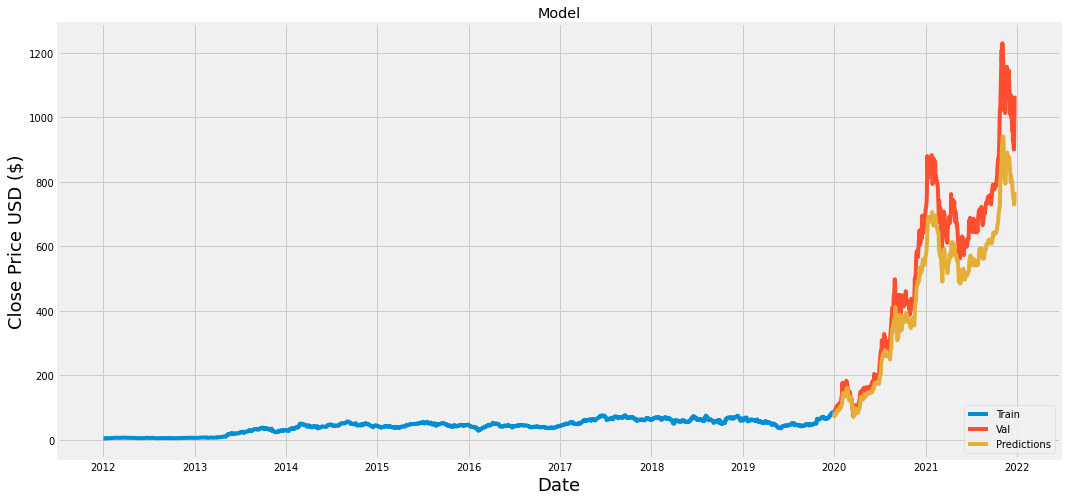

In [ ]:
train = data[:training_data_length]
valid = data[training_data_length:]
valid['Predictions'] = predictions
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2019-12-30,82.940002,76.144821
2019-12-31,83.666000,74.906281
2020-01-02,86.052002,74.186722
2020-01-03,88.601997,74.919594
2020-01-06,90.307999,76.749046
...,...,...
2021-12-17,932.570007,751.127563
2021-12-20,899.940002,743.868896
2021-12-21,938.530029,729.973267


In [ ]:
apple_quote = pdr.get_data_yahoo('TSLA', start='2012-01-01', end='2022-3-6')
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
[[690.6239]]


In [ ]:
apple_quote = pdr.get_data_yahoo('TSLA', start='2012-01-01', end='2022-4-2')
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
[[698.6415]]


In [ ]:
apple_quote = pdr.get_data_yahoo('TSLA', start='2012-01-01', end='2022-4-20')
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
[[698.6415]]


In [ ]:
apple_quote2 = pdr.get_data_yahoo('TSLA', start='2021-12-10', end='2021-12-30')
print(apple_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2021-12-10    1017.030029
2021-12-13     966.409973
2021-12-14     958.510010
2021-12-15     975.989990
2021-12-16     926.919983
2021-12-17     932.570007
2021-12-20     899.940002
2021-12-21     938.530029
2021-12-22    1008.869995
2021-12-23    1067.000000
2021-12-27    1093.939941
2021-12-28    1088.469971
2021-12-29    1086.189941
Name: Close, dtype: float64


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
model.save('{}.h5'.format('test')) 

In [ ]:
# my_model directory
!ls 

apple.h5  gdrive  sample_data  saved_model  tesla.h5


In [ ]:
from google.colab import files
files.download('{}.h5'.format('test'))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>